<a href="https://colab.research.google.com/github/giovanibrmiguel/DS_Studies/blob/main/Samsumg_Ocean_Deep_Learning_e_Keras_parte_II_13_08_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Board de explicações das duas aulas aqui](https://miro.com/app/board/o9J_l2j6jos=/)

# Importing data, TensorFlow, Keras and other tools

In [1]:
from tensorflow import keras # Importa a biblioteca Keras 
from keras.datasets import mnist # Base de Dados MNIST (60k de imagens de treino e 10k de imagens de teste)
from tensorflow.python.keras import Sequential # Arquitetura da nossa rede neural 
from tensorflow.python.keras.layers import Dense, Dropout # Neurônio (base da rede) e Regularizador (evita overfitting) 
from tensorflow.compat.v1.keras.optimizers import RMSprop # Otimizador (back propagation) 

In [2]:
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

# X_treino -> 60k imagens, 28x28 pixels
# y_treino -> 60k imagens, Contém o que está desenhado na imagem

# X_teste -> 10k imagens, 28x28 pixels
# y_teste -> 10k imagens, Contém o que está desenhado na imagem

# First look at dataset

In [3]:
# Dando uma olhada no que o dataset contém

print('Quantidade de imagens para treino: ', len(x_treino))
print('Tipo de treino: ', type(x_treino))

primeira_imagem = x_treino[0]
respresentação_primeira_imagem = y_treino[0]

print("o que a primeira imagem representa:", respresentação_primeira_imagem)

print('Quantidade de imagens para teste: ', len(x_teste))
print('Tipo de teste: ', type(x_teste))


Quantidade de imagens para treino:  60000
Tipo de treino:  <class 'numpy.ndarray'>
o que a primeira imagem representa: 5
Quantidade de imagens para teste:  10000
Tipo de teste:  <class 'numpy.ndarray'>


In [4]:
primeira_imagem

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

a imagem representa:  2


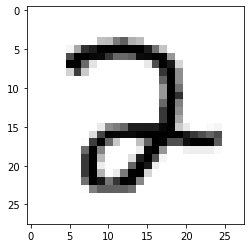

In [6]:
import matplotlib.pyplot as plt

indice = 1800

print("a imagem representa: ", y_treino[indice])

plt.imshow(x_treino[indice], cmap = plt.cm.binary)

In [7]:
# Fluxo para construção da rede neural

# - Organizar a camada de entrada (input)
# - Organizar a camada de saída (output)
# - Estruturar a nossa rede neural
# - Treinar o modelo
# - Fazer as previsões

# Preparing entry layer

## Flattening pixel matrix: transforming it in a single list

In [8]:
# Achatando a matriz de pixels e transformando em uma única lista

quantidade_treino = len(x_treino) # 60000
quantidade_teste = len(x_teste) # 10000

resolucao_imagem = x_treino[0].shape # (28, 28)
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1] # 28 * 28 = 784

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)

x_teste = x_teste.reshape(quantidade_teste, resolucao_total)

In [9]:
print("Quantidade de itens em x_treino[0]:", len(x_treino[0]))

# Como será que ficou x_treino[0]?
print(x_treino[0])

Quantidade de itens em x_treino[0]: 784
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 25

## Data normalization

In [10]:
# Normalização de dados

# 255 vire 1
# 127 vire 0.5
# 0 vire 0
# E assim por diante

# Posso pegar o meu valor que eu quero transformar e dividir pelo valor máximo do meu intervalo
# Exemplo, se eu dividir 255 por 255, tenho 1
# Exemplo, se eu dividir 127 por 255, tenho ~0.5
# Exemplo, se eu dividir 0 por 255, tenho 0

"""
# Explicando o porque da conversão de tipos

primeira_imagem = x_treino[0]
primeiro_pixel = primeira_imagem[0] # uint8

# Quando eu divido uint8 por algum número, recebemos um float64
# Porém, o tensorflow precisa de float32 para trabalhar
# Portanto, precisamos converter o tipo antes de dividí-lo

print(primeiro_pixel, type(primeiro_pixel / 255)) # float64

# Fim da explicação
"""

'\n# Explicando o porque da conversão de tipos\n\nprimeira_imagem = x_treino[0]\nprimeiro_pixel = primeira_imagem[0] # uint8\n\n# Quando eu divido uint8 por algum número, recebemos um float64\n# Porém, o tensorflow precisa de float32 para trabalhar\n# Portanto, precisamos converter o tipo antes de dividí-lo\n\nprint(primeiro_pixel, type(primeiro_pixel / 255)) # float64\n\n# Fim da explicação\n'

In [11]:
# Normalização de dados

# Conversão para tipos

x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

x_treino /= 255

In [12]:
# Como está o pixel 350 da primeira imagem de x_treino?
print(x_treino[0][350], type(x_treino[0][350]))

# Como está x_treino[0] agora?
print(x_treino[0])

0.27450982 <class 'numpy.float32'>
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.       

# Preparing output layer

In [15]:
# preparação da camada de saida

# Quais as possibilidades de saída? 0 a 9
# Atualmente nas labels temos 0,1,2,3,4,5,6,7,8,9
# Transformaremos para o formato da camada de saída [0,0,0,0,0,0,0,0,0,0]
# Sendo que cada número possui o valor 1 na posição que corresponde a ele
# Exemplo: 
# Numero 5  [0,0,0,0,1,0,0,0,0,0]
# Numero 9  [0,0,0,0,0,0,0,0,0,1]

valores_unicos = set(y_treino)
print(valores_unicos)

quantidade_valores_unicos = len(valores_unicos) #10

# Transformação de valores inteiros em valores categóricos

print("y_treino[0] antes: ", y_treino[0])

y_treino = keras.utils.to_categorical(y_treino, quantidade_valores_unicos)
y_teste = keras.utils.to_categorical(y_teste, quantidade_valores_unicos)

print("y_treino[0] depois: ", y_treino[0]) # basicamente dummyzamos o y label


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
y_treino[0] antes:  5
y_treino[0] depois:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [16]:
# Prever os resultados é transformar os valores categóricos em um número equivalente 
# Ex:
# 0   1   2   3   4   5   6   7   8   9  
# 0.1 0.  0.  0.3 0.  0.7 0.  0.  0.1 0.
# Preveu o número 5

# Creating Neural Network

[Quantos neuronios e quantas camadas?](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw)

[Qual função de ativação usar?](https://www.deeplearningbook.com.br/?s=ativa%C3%A7%C3%A3o)

In [20]:
model = Sequential()

# primeira hidden layer
# 30 neuronios
# função de ativação RELU
# como estamos na primeira hidden layer, precisamos definir o formato da camada de entrada 

model.add(Dense(30, activation='relu', input_shape=(resolucao_total,)))

# Adicionamos um regularizador, que ajuda a evitar overfitting

model.add(Dropout(0.2))

# Segunda hidden layer 
# 20 neuronios
# Função de ativação RELU

model.add(Dense(20, activation='relu'))

# Mais um regularizador depois da segunda camada:

model.add(Dropout(0.2))

# Finalizando a camada de saída

model.add(Dense(quantidade_valores_unicos, activation='softmax'))

# exibimos o resumo do modelo criado

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                23550     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


# Training model

In [23]:
# Compila e treina o modelo
# Definimos função de erro
# Definimos o otimizador 
# Definimos a métrica de aprendizado

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Treinamos o modelo

# imagens em treino e labels

# Tamanho em batch (batch size, potencia de 2)

# epochs = periodos de treino, defino o quanto vou treinar

# verbose true pra ver o que está acontecendo

# Imagens em teste e labels

history = model.fit(x_treino, y_treino,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_teste, y_teste))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.8603 - accuracy: 0.7230 - val_loss: 34.5500 - val_accuracy: 0.9139
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4812 - accuracy: 0.8548 - val_loss: 30.3044 - val_accuracy: 0.9282
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4052 - accuracy: 0.8795 - val_loss: 27.9213 - val_accuracy: 0.9361
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3664 - accuracy: 0.8921 - val_loss: 27.9343 - val_accuracy: 0.9379
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3425 - accuracy: 0.9001 - val_loss: 27.0661 - val_accuracy: 0.9423
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3215 - accuracy: 0.9056 - val_loss: 27.2040 - val_accuracy: 0.9448
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3130 - accuracy: 0.9098 - val_loss: 27.8566 - val_accuracy: 0.9448

# Making predictions 

valor categorico em y_teste[indice]:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Previsão: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
previsao ajustada:  [7]


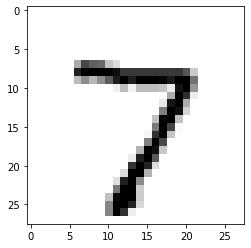

In [31]:
# fazendo previsões

indice = 0 

print("valor categorico em y_teste[indice]: ", y_teste[indice]) #é um 7

imagem = x_teste[indice].reshape((1, resolucao_total))

prediction = model.predict(imagem)
print("Previsão:", prediction)

# Traduzindo para inteiro: 
import numpy as np
prediction_class = np.argmax(prediction,axis = -1)
print('previsao ajustada: ', prediction_class)


(x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()
plt.imshow(x_teste_img[indice], cmap = plt.cm.binary)